In [61]:
import numpy as np
import pandas as pd
import datetime

In [62]:
wind_farms = pd.read_csv("../data/wind_farms_data.csv")
print(wind_farms.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   farm_name  1200 non-null   object 
 1   zone       1200 non-null   object 
 2   city       1144 non-null   object 
 3   turbines   1200 non-null   int64  
 4   latitude   1200 non-null   float64
 5   longitude  1200 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.4+ KB
None


Drop stations outside the Iberian Peninsula as they are not relevant for power generation forecasting.

In [63]:
wind_farms = wind_farms[wind_farms.latitude > 30]
wind_farms = wind_farms[wind_farms.turbines > 0]

In [64]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter_geo(wind_farms, lat="latitude",lon="longitude",
                     hover_name="farm_name",
                     size="turbines",
                    #size_max=50,
                     hover_data=["zone","city"],
                     projection="natural earth",
                     #scope="europe",
                     #center=dict(lat=40.4115, lon=3.7076),
                     opacity = 0.4,
                     #color="n_killed",
                     #color_continuous_scale = "Turbo",#["#34eb89","#dcff33","#ff2655","#9e0022"],
                     title = "Estaciones con aerogeneradores en España"
                    #  color="n_killed_group",
                    #  color_discrete_sequence  =["#919090","#ff8aa3","#ff2655","#9e0022"]
                     )
fig.update_layout(
    autosize=True,
    height=600,
    geo=dict(
        center=dict(
            lat=39.8115,
            lon=-1.9076
        ),
        scope='europe',
        projection_scale=6
    )
)
                     
fig.show()

Cluster the stations by distance

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(wind_farms[["latitude","longitude"]])
    sse.append(kmeans.inertia_)

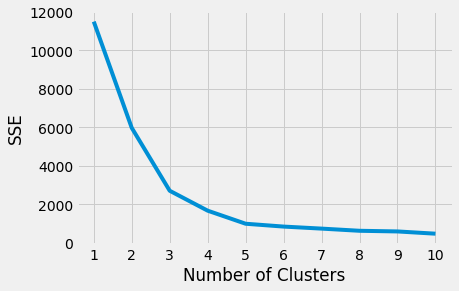

In [66]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [67]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(wind_farms[["latitude","longitude"]])
kmeans.cluster_centers_

array([[36.62490083, -5.54178512],
       [42.05736316, -4.26093684],
       [43.01579556, -7.76558222],
       [41.67122414, -1.42978276],
       [38.90360345, -1.91963218]])

In [68]:
wind_farms["kmeans_labels"] = kmeans.labels_

In [69]:
fig = px.scatter_geo(wind_farms, lat="latitude",lon="longitude",
                     hover_name="farm_name",
                     size="turbines",
                    #size_max=50,
                     hover_data=["zone","city"],
                     projection="natural earth",
                     #scope="europe",
                     #center=dict(lat=40.4115, lon=3.7076),
                     opacity = 0.4,
                     color="kmeans_labels",
                     #color_continuous_scale = "turbo",#["#34eb89","#dcff33","#ff2655","#9e0022"],
                     title = "Estaciones con aerogeneradores en España",
                     )
fig.update_layout(
    autosize=True,
    height=600,
    geo=dict(
        center=dict(
            lat=39.8115,
            lon=-1.9076
        ),
        scope='europe',
        projection_scale=6
    )
)
                     
fig.show()

In [70]:
wind_farms.to_csv("../data/wind_farms_with_clusters.csv")

In [71]:
wind_farms

,farm_name,zone,city,turbines,latitude,longitude,kmeans_labels
0,A Capelada I,La Coruna (Galicia),"Cariño, Cedeira, Ortigueira",50,43.717,-7.937,2
1,A Capelada II,La Coruna (Galicia),"Cariño, Cedeira, Ortigueira",45,43.687,-7.960,2
2,A Pastoriza,Lugo (Galicia),"A Pastoriza, Mondoñedo, Riotorto",10,43.374,-7.327,2
3,A Ruña,La Coruna (Galicia),"Muros, Mazaricos",41,42.940,-8.990,2
6,Abuela Santa Ana,Albacete (Castilla-La Mancha),Pozo Llorente,25,39.053,-1.502,4
...,...,...,...,...,...,...,...
1195,Yerga II,Logroño (La Rioja),"Alfaro, Autol",36,42.144,-1.956,3
1196,Zarzuela II,Cadiz (Andalucía),Tarifa,8,36.010,-5.600,0
1197,Zas,La Coruna (Galicia),"Zas, Santa Comba",90,43.100,-8.870,2
1198,Zorraquín,Soria (Castilla y Leon),"Gomyo, Villaciervos",6,41.760,-2.630,3
